<a href="https://colab.research.google.com/github/iqqy-x/YOLOv5-Gazebosim-Fine-Tuning/blob/main/YOLOv5_Gazebo_Simulation_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Dec 23 12:20:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Setup YOLOv5


In [2]:
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17771, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 17771 (delta 95), reused 54 (delta 54), pack-reused 17616 (from 2)
Receiving objects: 100% (17771/17771), 17.10 MiB | 30.40 MiB/s, done.
Resolving deltas: 100% (12078/12078), done.


In [4]:
%cd /content/yolov5/
!pip install -r requirements.txt
!pip uninstall wandb -qy
import torch

from IPython.display import Image, clear_output

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.9 MB/s eta 0:00:00
Setup complete. Using torch 2.9.0+cu126 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_processor_count=40, uuid=6d5a6a7e-467a-39ce-b84b-786e3f84ca3e, pci_bus_id=0, pci_device_id=4, pci_domain_id=0, L2_cache_size=4MB)


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="your_api_key")
project = rf.workspace("your_worskpace").project("your_project")
version = project.version(8)
dataset = version.download("yolov5")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 130.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Simulation-8 in yolov5pytorch:: 100%|██████████| 26466/26466 [00:02<00:00, 10156.99it/s]


In [6]:
print(dataset.location)

/content/yolov5/Simulation-8


# Train Custom YOLOv5 Detector

- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J))
- **name:** result names
- **cache:** cache images for faster training

In [7]:
%%time
%cd /content/yolov5/
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 10 \
  --data {dataset.location}/data.yaml \
  --weights yolov5s.pt \
  --name yolov5s_results  \
  --cache

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
        6/9      4.55G    0.02528   0.004008   0.002803         18        640:  63% 467/737 [02:42<01:20,  3.34it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        6/9      4.55G    0.02529   0.004006   0.002839         15        640:  64% 468/737 [02:43<01:24,  3.17it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        6/9      4.55G     0.0253   0.004005   0.002859         16        640:  64% 469/737 [02:43<01:24,  3.16it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(

In [10]:
%cd /content/
!python up_model.py

/content
Login success!
Create repository: iqqy/yolov5s-finetune...
Up model /content/yolov5/runs/train/yolov5s_results...
Processing Files (0 / 0)      : |          |  0.00B /  0.00B            
New Data Upload               : |          |  0.00B /  0.00B            

  ...s_results/weights/best.pt:   2% 261k/14.5M [00:00<?, ?B/s]


  ...s_results/weights/last.pt:   2% 261k/14.5M [00:00<?, ?B/s]

  ...s_results/weights/best.pt:   2% 261k/14.5M [00:00<?, ?B/s]


Processing Files (0 / 2)      :   1% 522k/35.0M [00:00<00:53, 642kB/s,  869kB/s  ]



  ...ov5s_results/F1_curve.png:   2% 3.37k/212k [00:00<?, ?B/s]




  ...ov5s_results/PR_curve.png:   2% 2.16k/136k [00:00<?, ?B/s]





  ...lov5s_results/P_curve.png:   2% 2.39k/151k [00:00<?, ?B/s]






  ...lov5s_results/R_curve.png:   2% 3.08k/194k [00:00<?, ?B/s]







  ...ults/confusion_matrix.png:   2% 2.42k/153k [00:00<?, ?B/s]








  ...93215.d636d8cc902b.5845.0:   2% 20.9k/1.32M [00:00<?, ?B/s]









  ...olov5s_results/lab

# Evaluate Custom YOLOv5 Detector Performance

/content/yolov5


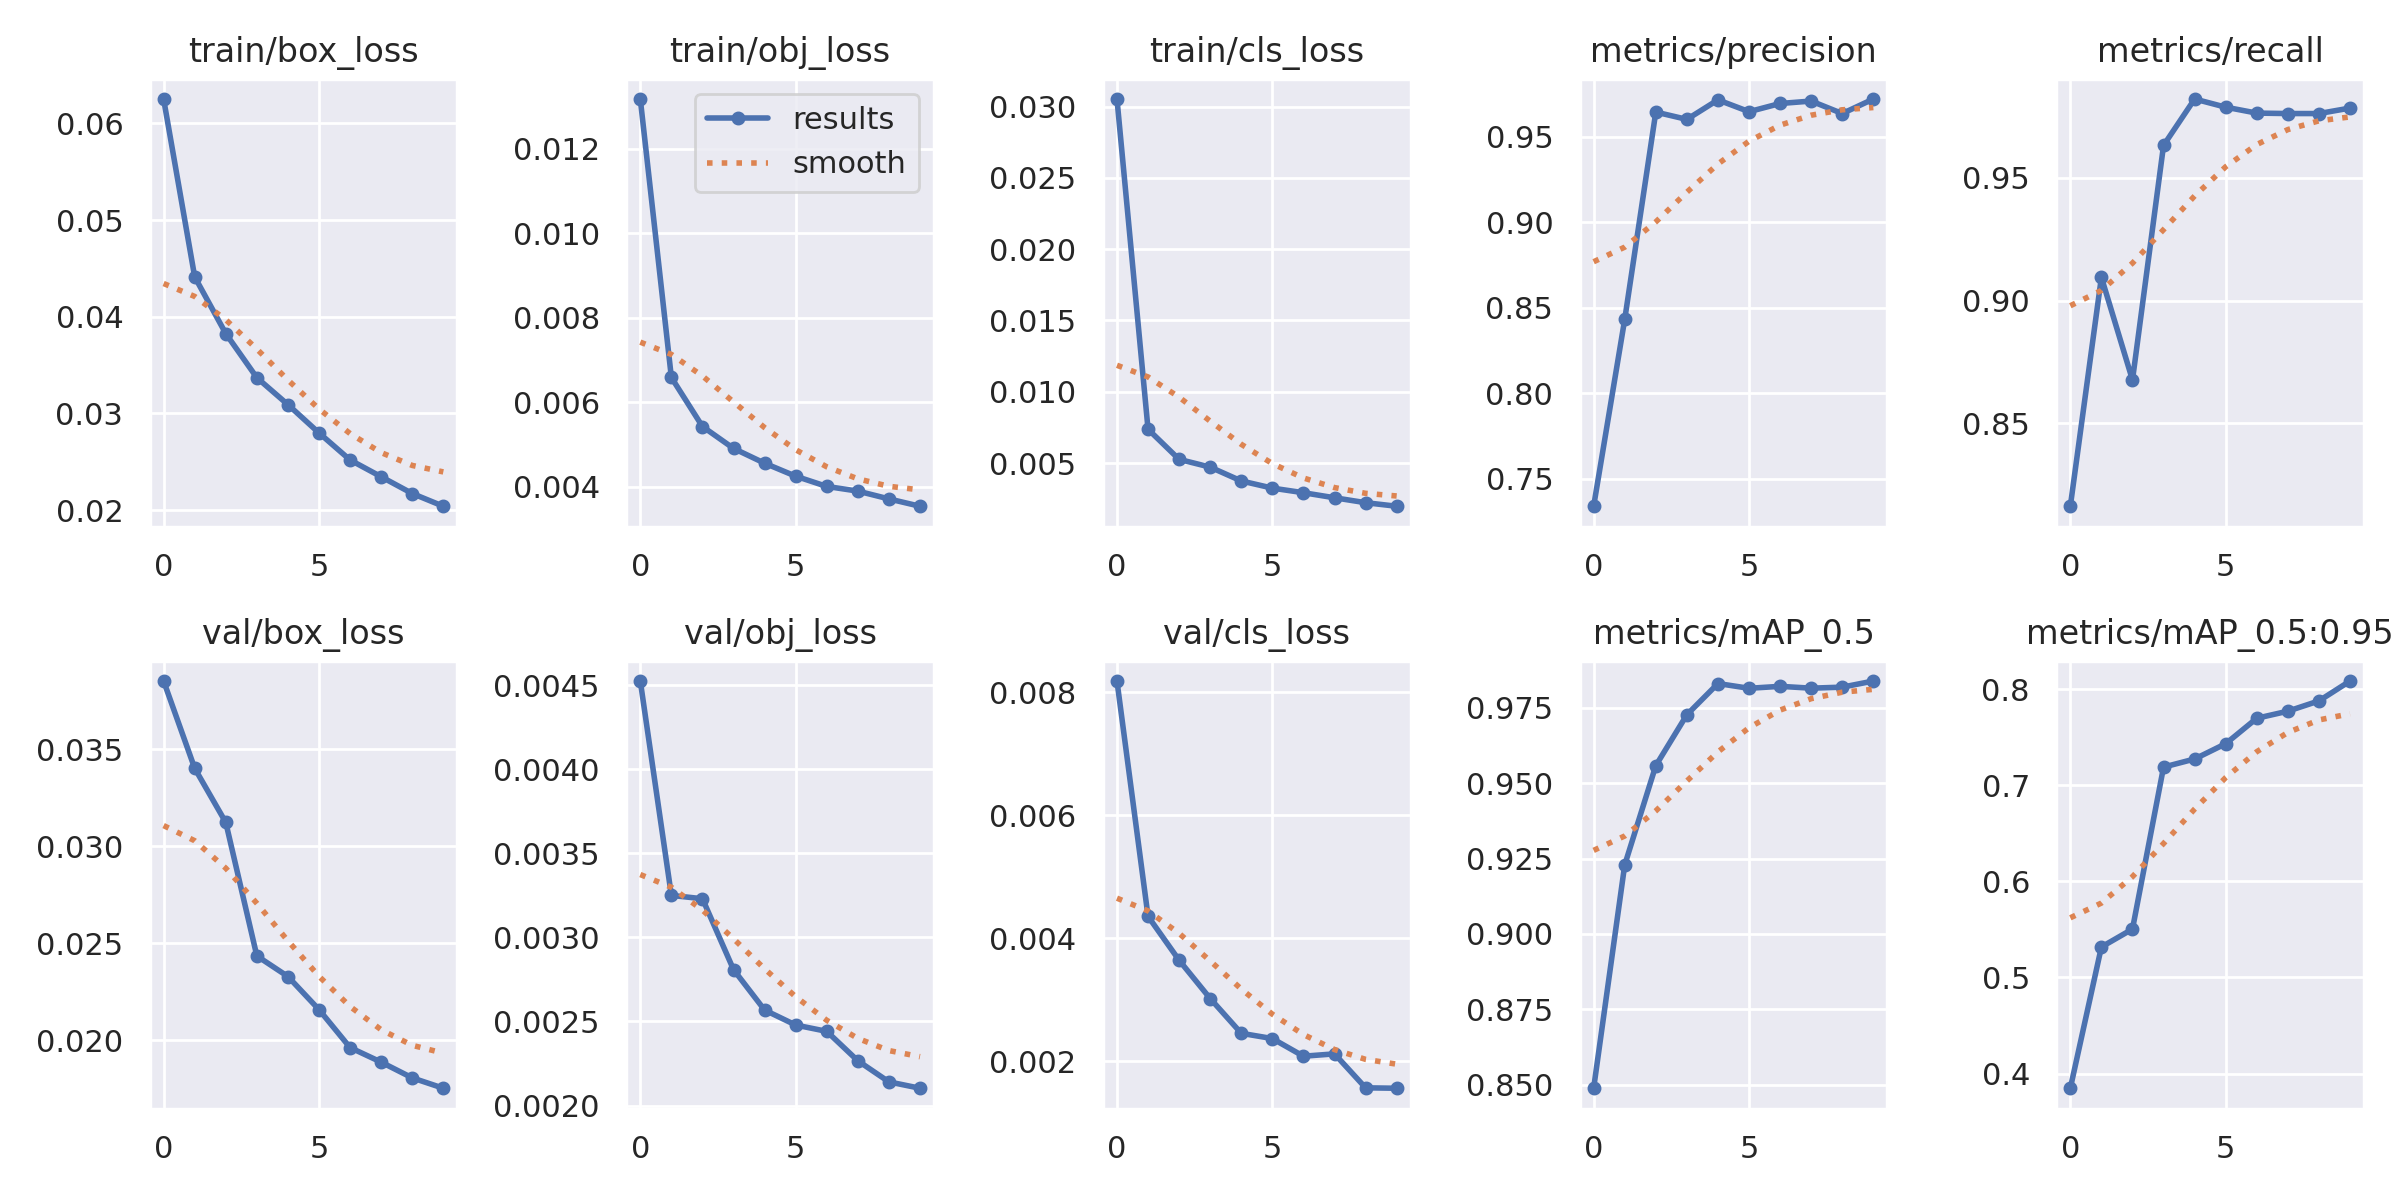

In [12]:
%cd /content/yolov5

from utils.plots import plot_results
from IPython.display import Image

Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)

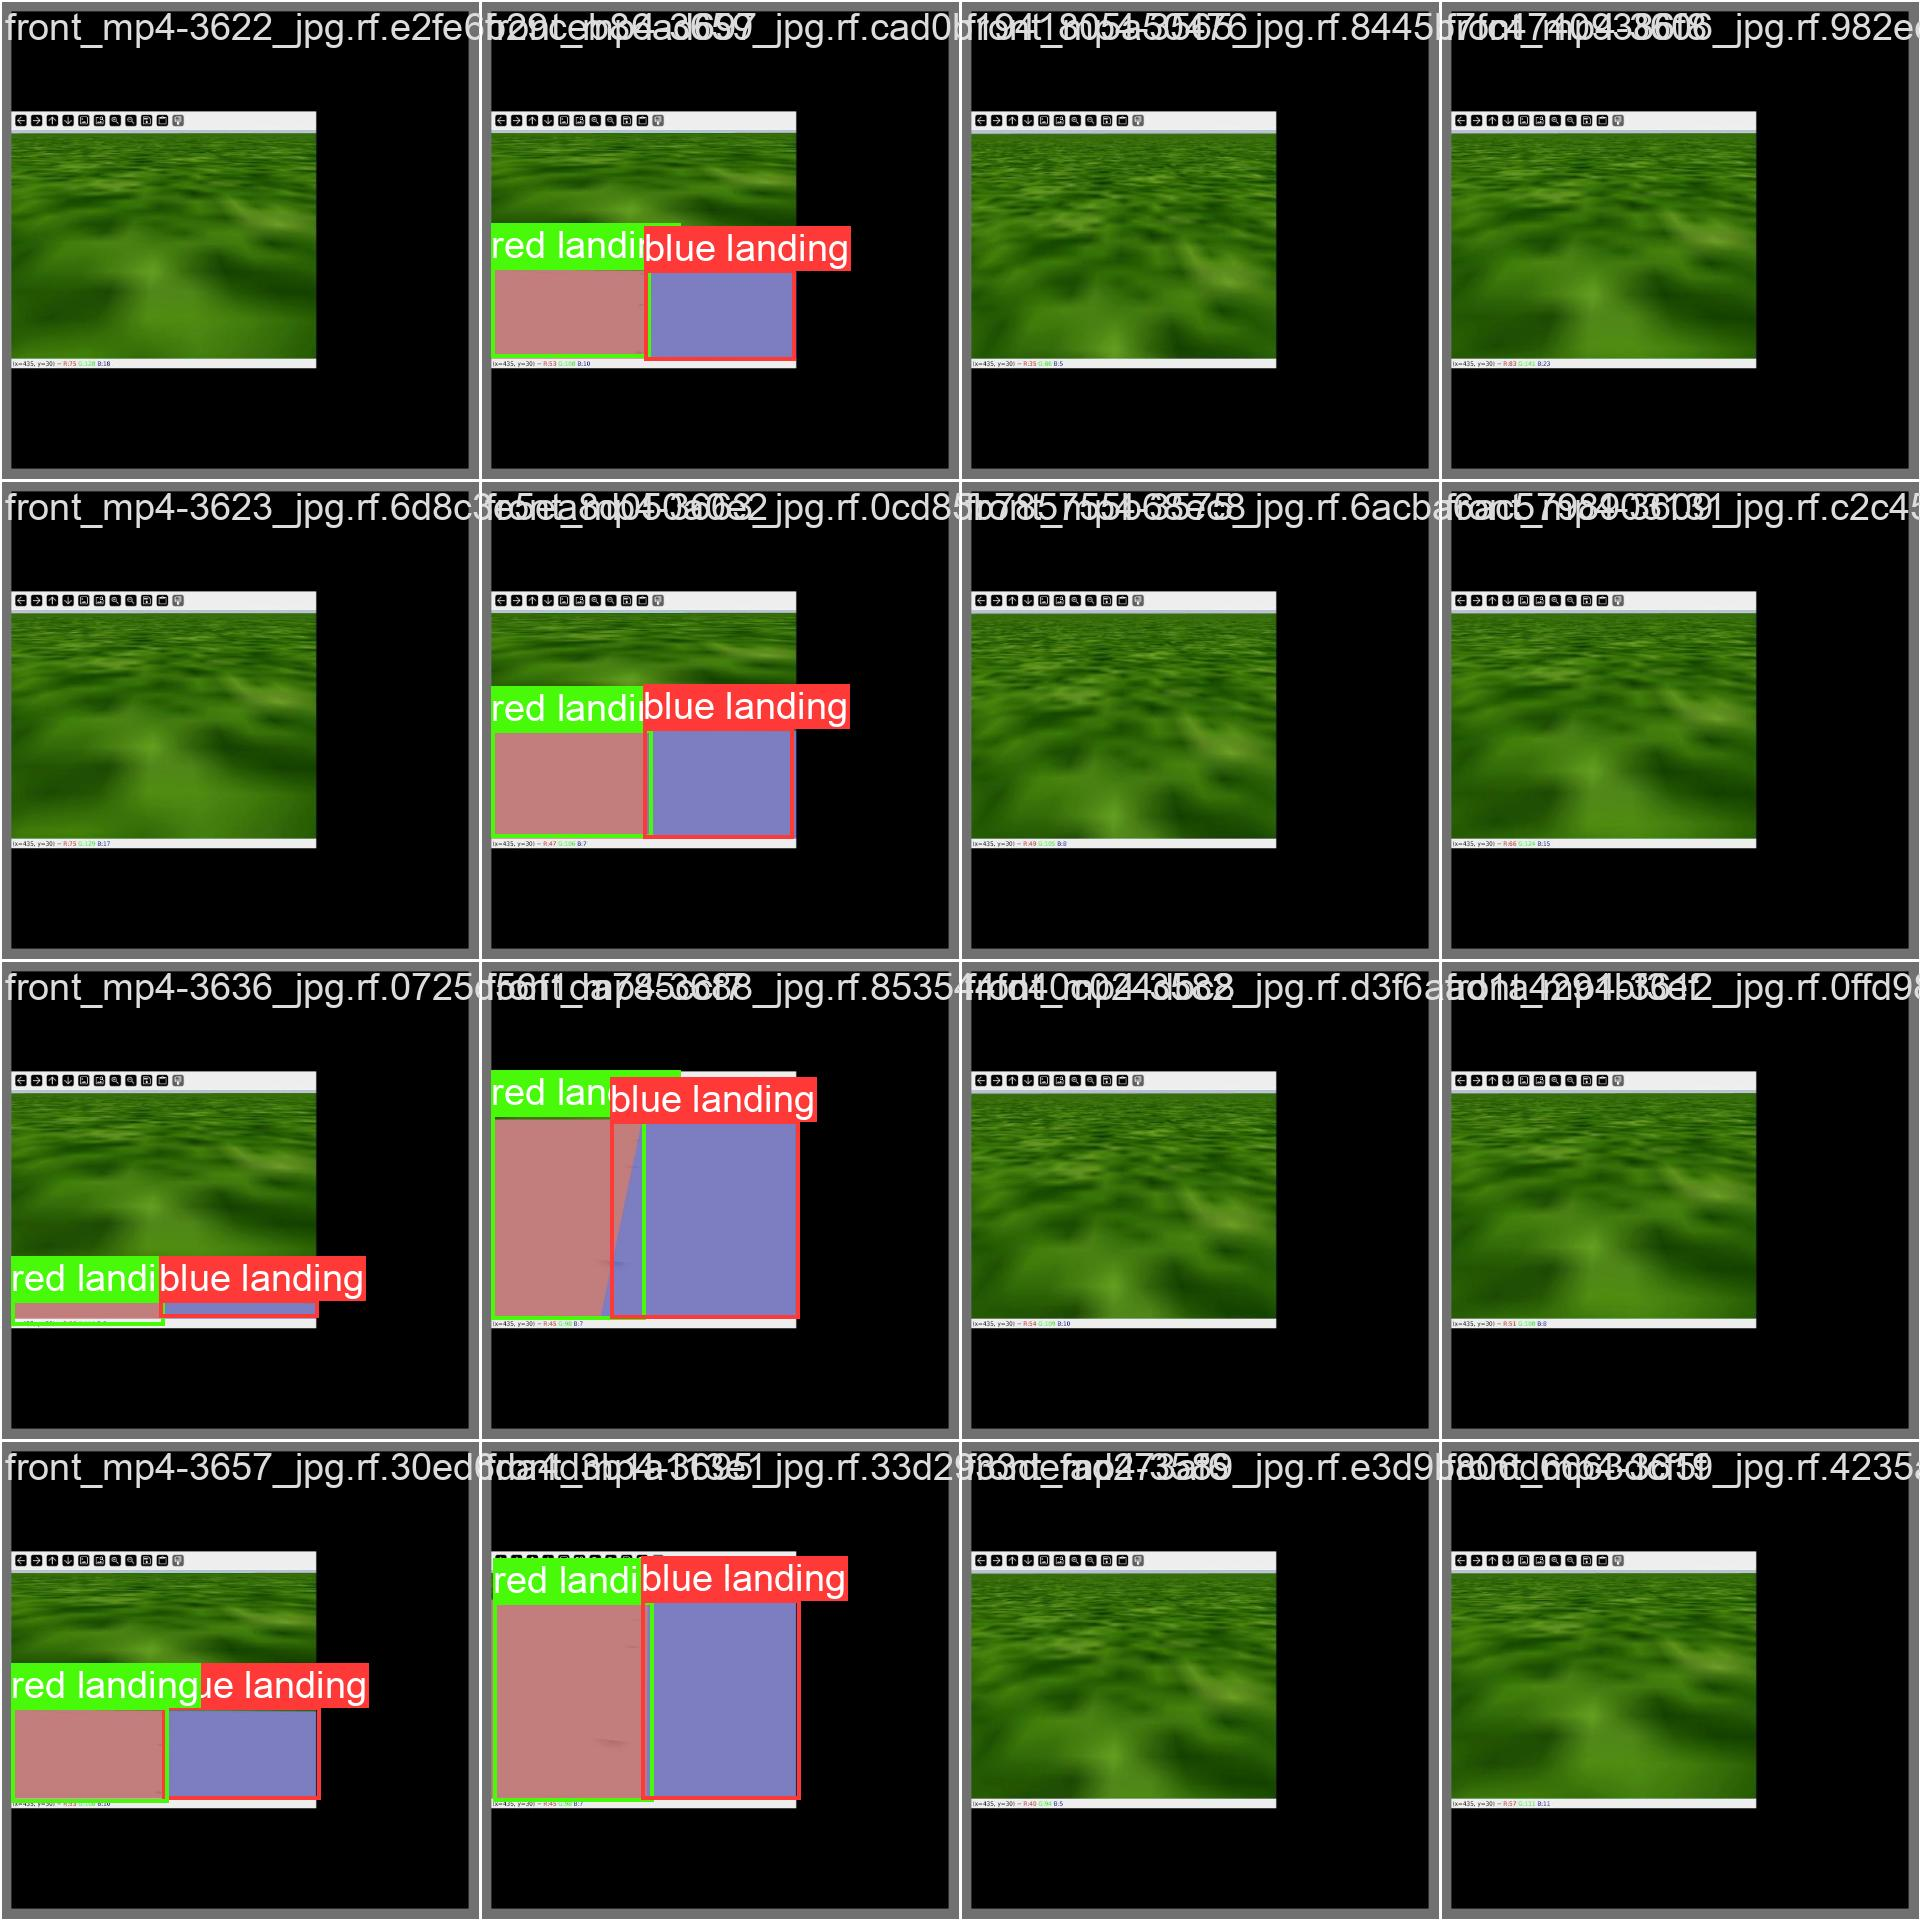

In [13]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


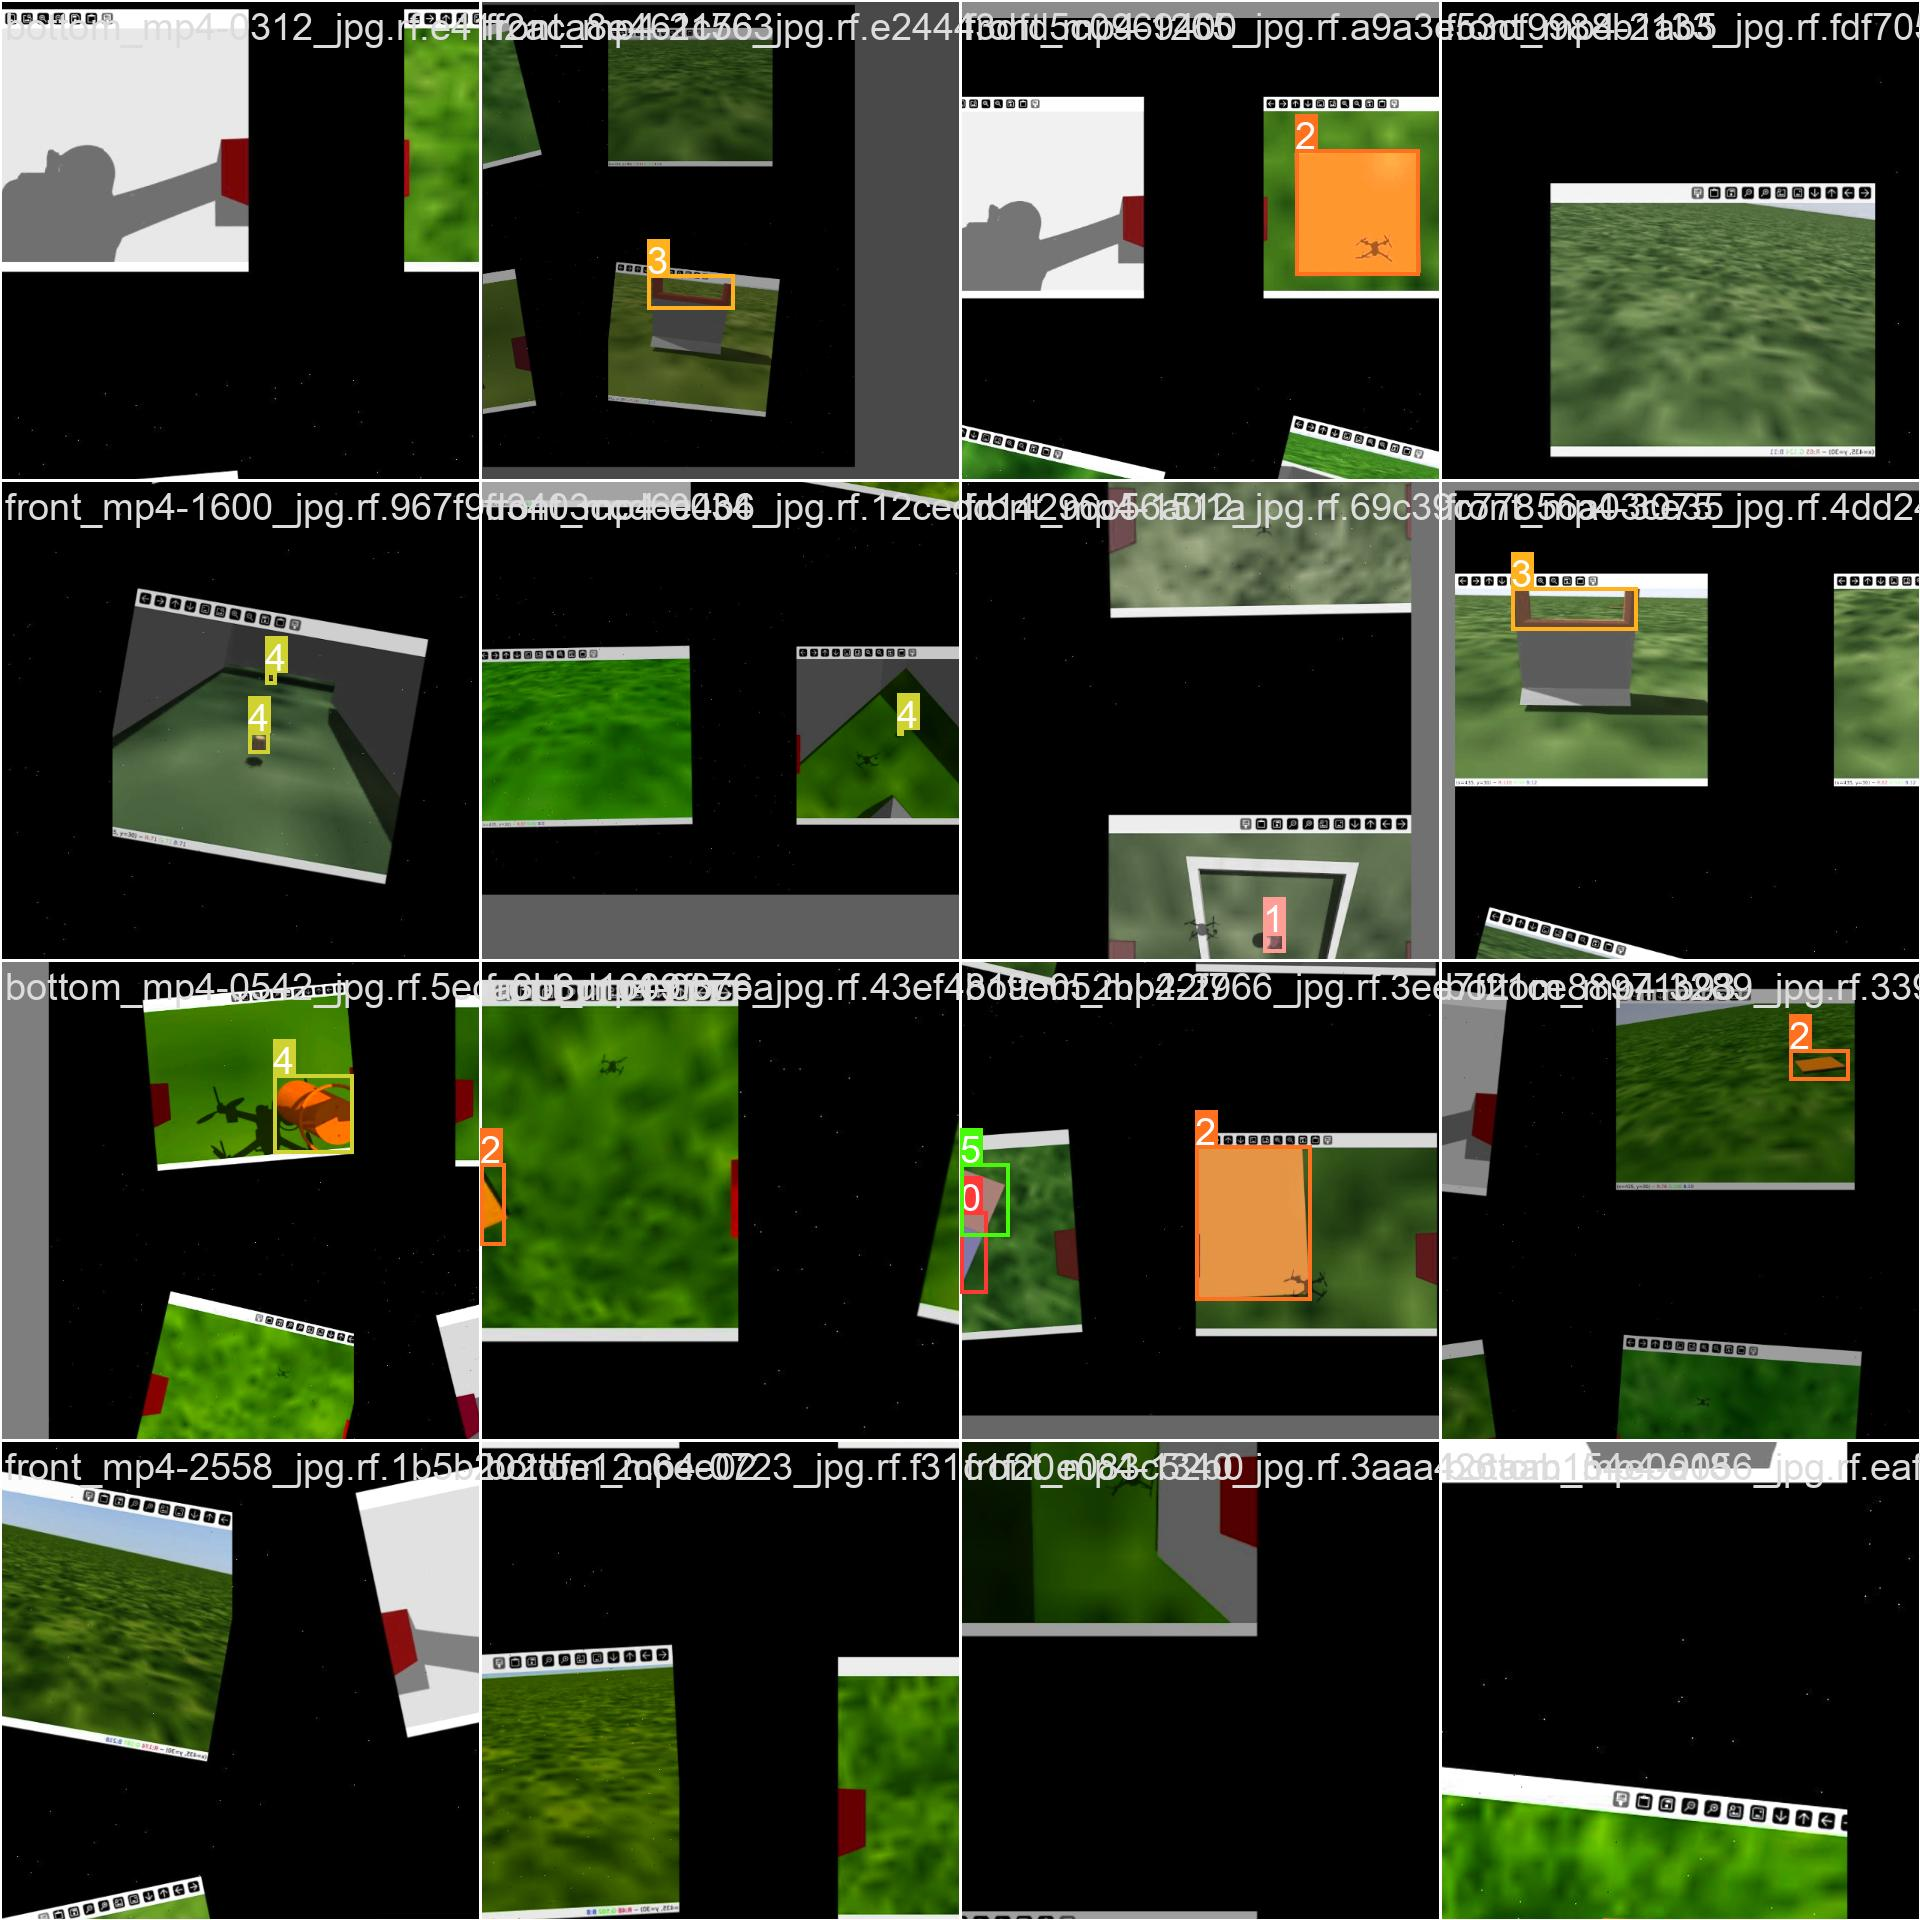

In [14]:
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

# Run Inference With Trained Weights

In [15]:
%ls runs/

train/


In [16]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [17]:
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 640 --conf 0.7 --source {dataset.location}/test/images/

/content/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/content/yolov5/Simulation-8/test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-453-geed9bc19 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/547 /content/yolov5/Simulation-8/test/images/bottom_mp4-0026_jpg.rf.1191d7a8ced7490fc634ea271ec0bbb8.jpg: 640x640 (no detections), 11.5ms
image 2/547 /content/yolov5/Simulation-8/test/images/bottom_mp4-0032_jpg.rf.2e58038b7df3ee19a3ff3f16be8317eb.jpg: 640x6

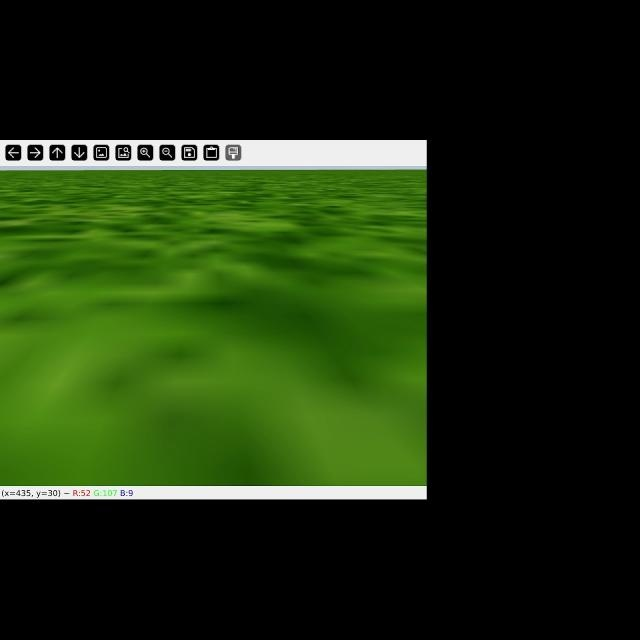

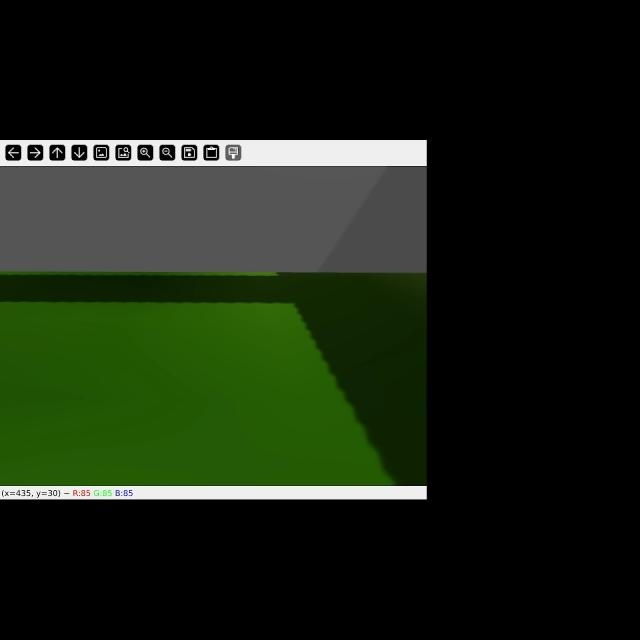

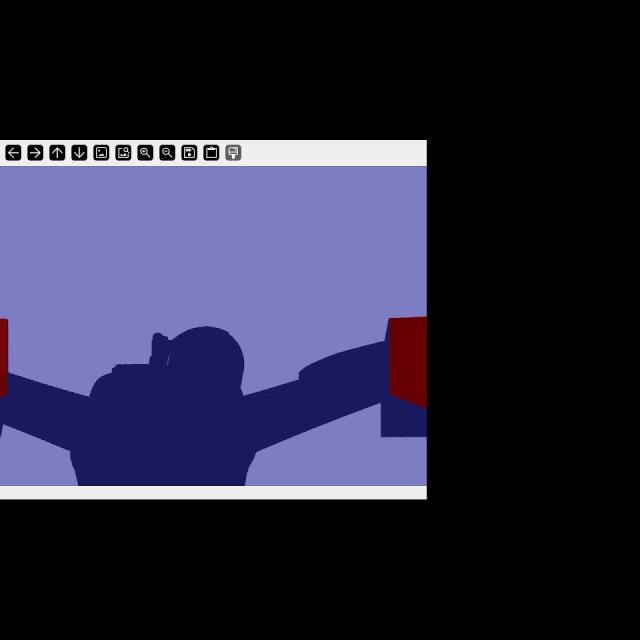

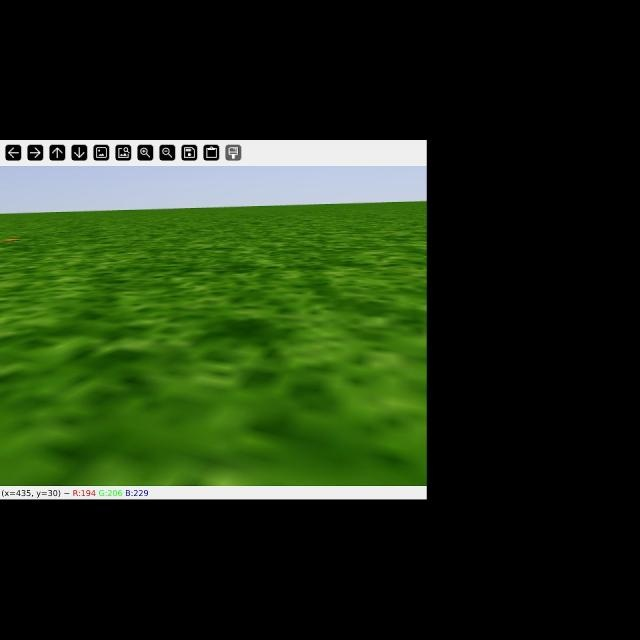

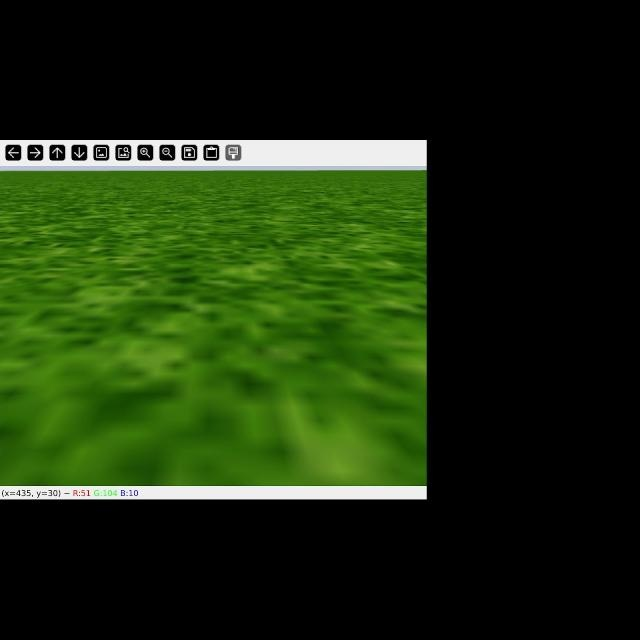

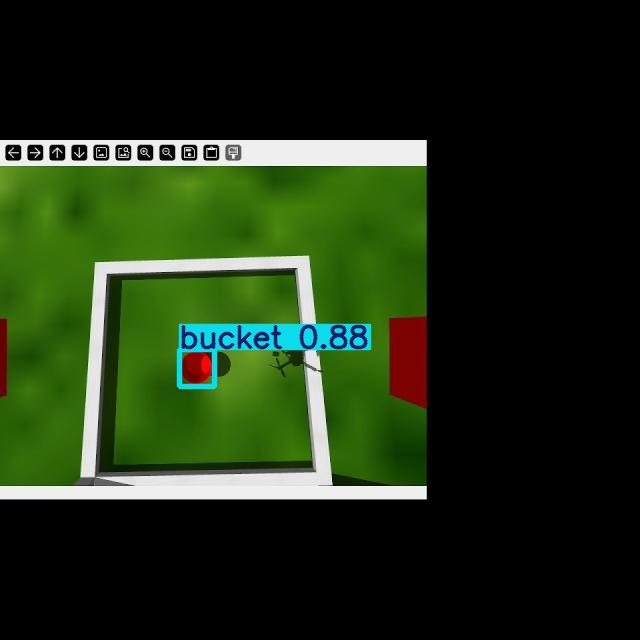

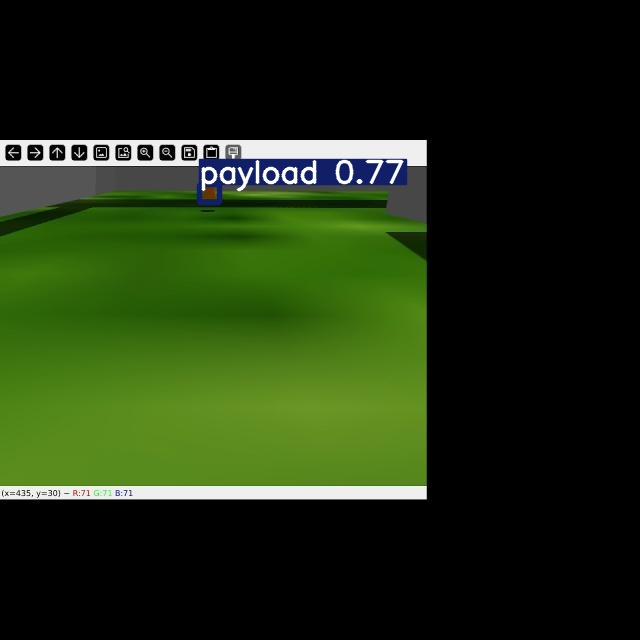

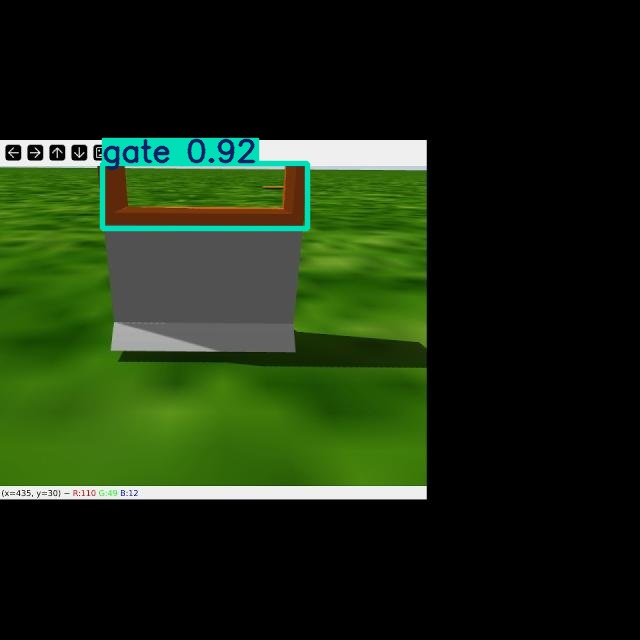

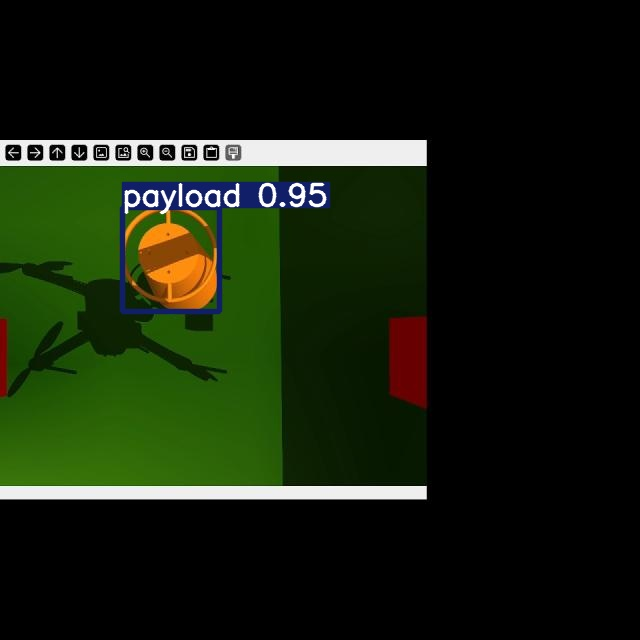

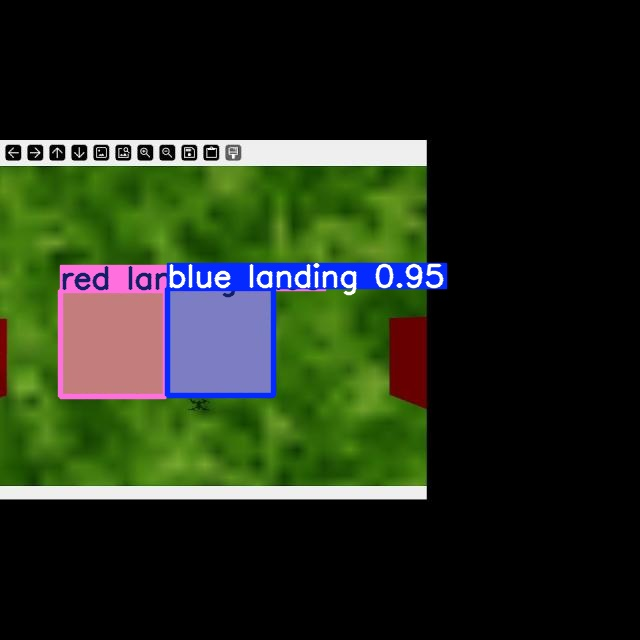

In [18]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg')[:10]:
    display(Image(filename=imageName))